<a href="https://colab.research.google.com/github/yareenm/Tensorflow_Practice/blob/main/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [11]:
dataFrame = pd.read_excel('bisiklet_fiyatlari.xlsx')

In [13]:
dataFrame.head(n=8)

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
5,950.221425,1749.463071,1751.099011
6,972.099912,1750.482746,1750.778662
7,730.747018,1750.724858,1748.037351


## Veriyi visualize etmek için kullanabileceğimiz yöntemler

In [15]:
import seaborn as sbn
import matplotlib.pyplot as plt

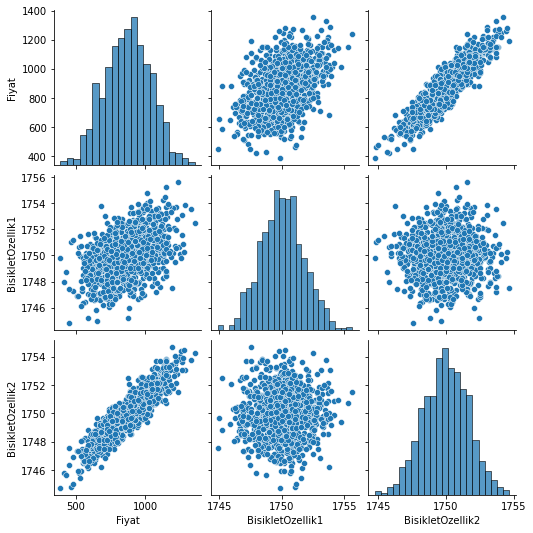

In [17]:
sbn.pairplot(dataFrame)

## **Veriyi test ve train olmak üzere iki gruba ayırıyoruz. İstediğimiz oran bazında ayrım gerçekleştiriyoruz.**

In [18]:
from sklearn.model_selection import train_test_split

In [ ]:
#train_test_split

In [23]:
# y = wx+b
# y -> label
y=dataFrame['Fiyat'].values
# x -> feature
x=dataFrame[['BisikletOzellik1','BisikletOzellik2']].values
# atanma sırasını değiştirmemeliyiz çünkü fonksiyon o şekilde dönüş sağlıyor
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [26]:
x_train.shape

(670, 2)

In [27]:
x_test.shape

(330, 2)

In [28]:
y_train

array([ 928.6952754, 1263.961903 ,  539.3910047,  909.0602356,
        827.5599926,  755.0897782,  871.0148095,  987.1951914,
       1072.273843 ,  694.625345 ,  750.4756224,  705.8022573,
        937.9704699,  699.7664082,  836.6511441,  957.4757753,
        692.5542986,  879.9817511, 1083.133861 ,  961.2584546,
        799.7283271,  890.4446699, 1043.475329 ,  581.3983762,
        921.2831591,  904.7251741,  749.7572009,  871.8325006,
        965.3876743, 1055.197693 , 1042.743866 ,  766.9644604,
       1129.98977  ,  775.1337641,  889.7252105,  704.0185578,
        937.2014327,  601.5369815, 1068.018878 ,  864.2491913,
        845.4859474, 1028.047418 ,  659.9882841,  812.2027726,
       1116.252739 ,  862.5282243,  888.309265 ,  781.6579817,
        988.8845581,  908.5516566,  811.7080229,  927.5018276,
        833.1474785, 1026.479661 , 1078.893552 ,  717.4170105,
        885.0577122,  836.6405309,  955.8568831, 1149.145803 ,
        806.2158674,  707.2491908, 1093.736882 ,  720.3

In [29]:
y_train.shape

(670,)

In [30]:
y_test.shape

(330,)

## **Veriyi modellemeden önce scaling işlemi yapmamız gerekir**

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [34]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [37]:
import tensorflow as tf

In [38]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

## **Model oluşturma**

In [39]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

## **Model eğitme kısmı**

In [40]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 2ms/step - loss: 795922.3125
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 795796.2500
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 795694.6875
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 795586.1250
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 795468.5000
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 795342.3125
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 795207.2500
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 795062.8750
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 794907.2500
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 794742.3750
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 794565.8750
Epoch 12/250
21/21 [==============================] - 0s 2ms/st

In [46]:
loss=model.history.history['loss']

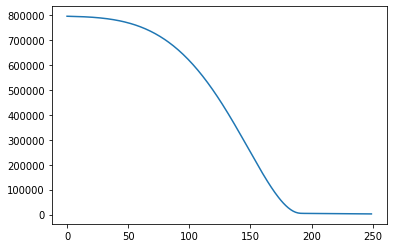

In [47]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [50]:
train_loss = model.evaluate(x_train,y_train,verbose=0)

In [51]:
test_loss = model.evaluate(x_test,y_test,verbose=0)

In [54]:
testTahminler = model.predict(x_test)

In [55]:
testTahminler

array([[1022.3103 ],
       [ 710.0519 ],
       [ 884.6947 ],
       [ 888.03094],
       [ 890.1485 ],
       [ 576.4925 ],
       [ 919.3474 ],
       [ 959.40735],
       [ 934.6199 ],
       [ 979.3217 ],
       [ 798.4689 ],
       [ 917.6693 ],
       [ 926.12756],
       [1007.71606],
       [1059.239  ],
       [ 746.00757],
       [1049.2871 ],
       [ 717.9829 ],
       [1067.1592 ],
       [ 891.48267],
       [ 893.94403],
       [ 778.75555],
       [ 600.5864 ],
       [ 691.62415],
       [ 858.068  ],
       [1034.8401 ],
       [ 768.203  ],
       [ 797.60046],
       [ 876.2776 ],
       [ 807.5965 ],
       [ 584.91205],
       [ 822.     ],
       [ 779.42957],
       [ 720.1274 ],
       [ 888.0692 ],
       [ 858.94727],
       [ 994.6297 ],
       [ 978.4769 ],
       [ 863.40234],
       [ 870.1831 ],
       [ 801.46454],
       [1084.4248 ],
       [1035.7941 ],
       [1030.2452 ],
       [ 888.5574 ],
       [ 689.99567],
       [1059.8883 ],
       [ 944.

In [56]:
tahminDf = pd.DataFrame(y_test,columns =['Gerçek Y Değerleri'])

In [57]:
tahminDf

,Gerçek Y Değerleri
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [60]:
testTahminler = pd.Series(testTahminler.reshape(330,))

In [61]:
testTahminler

0      1022.310303
1       710.051880
2       884.694702
3       888.030945
4       890.148499
          ...     
325     979.657898
326     818.536377
327     809.741028
328    1086.754028
329     823.969788
Length: 330, dtype: float32

## **Birleştirme işlemi yapacağız yani concast işlemi yapacağız.**

In [62]:
tahminDf = pd.concat([tahminDf,testTahminler],axis=1)

In [64]:
tahminDf.columns = ['Gerçek Y Değerleri', 'Tahmin Y Değerleri']

In [65]:
tahminDf

,Gerçek Y Değerleri,Tahmin Y Değerleri
0,1081.652164,1022.310303
1,622.675990,710.051880
2,889.356810,884.694702
3,902.826733,888.030945
4,897.662404,890.148499
...,...,...
325,1028.438035,979.657898
326,789.934950,818.536377
327,758.490486,809.741028
328,1172.871659,1086.754028


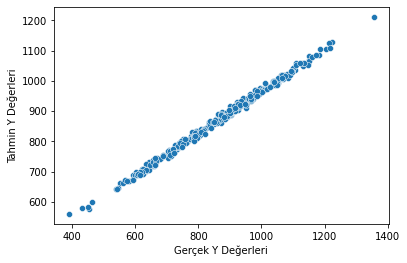

In [68]:
sbn.scatterplot(x= 'Gerçek Y Değerleri' , y= 'Tahmin Y Değerleri', data=tahminDf)

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
mean_absolute_error(tahminDf['Gerçek Y Değerleri'],tahminDf['Tahmin Y Değerleri'])

40.70139446281486

In [73]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [74]:
yeniBisikletOzellikleri = [[1760,1758]]

In [75]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [76]:
model.predict(yeniBisikletOzellikleri)

array([[1667.2561]], dtype=float32)

In [77]:
from tensorflow.keras.models import load_model

In [78]:
model.save('bisiklet_modeli.h5')

In [79]:
sonradanCagirilanModel= load_model('bisiklet_modeli.h5')

In [80]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri)

array([[1667.2561]], dtype=float32)